# Feature Selection - Information gain - mutual information in CLASSIFICATION Problem statements

In [1]:
import pandas as pd
df = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

**Here we can see the Wine column which is our target column has 3 unique classes so it is a discrete variable**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### Lets do the train test split first in order to avoid the overfitting problem

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(labels =['Wine'],axis=1)
Y = df['Wine']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [6]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


### Lets now use the mutual_info_claff method from sklearn library

In [7]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([0.41145535, 0.29021441, 0.16101181, 0.25651547, 0.17651343,
       0.48891568, 0.7215563 , 0.13051156, 0.2569572 , 0.62601884,
       0.55785103, 0.55208613, 0.53079317])

In [9]:
# in order to sort and visualize the result

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Flavanoids              0.721556
Color.int               0.626019
Hue                     0.557851
OD                      0.552086
Proline                 0.530793
Phenols                 0.488916
Alcohol                 0.411455
Malic.acid              0.290214
Proanth                 0.256957
Acl                     0.256515
Mg                      0.176513
Ash                     0.161012
Nonflavanoid.phenols    0.130512
dtype: float64

<AxesSubplot:>

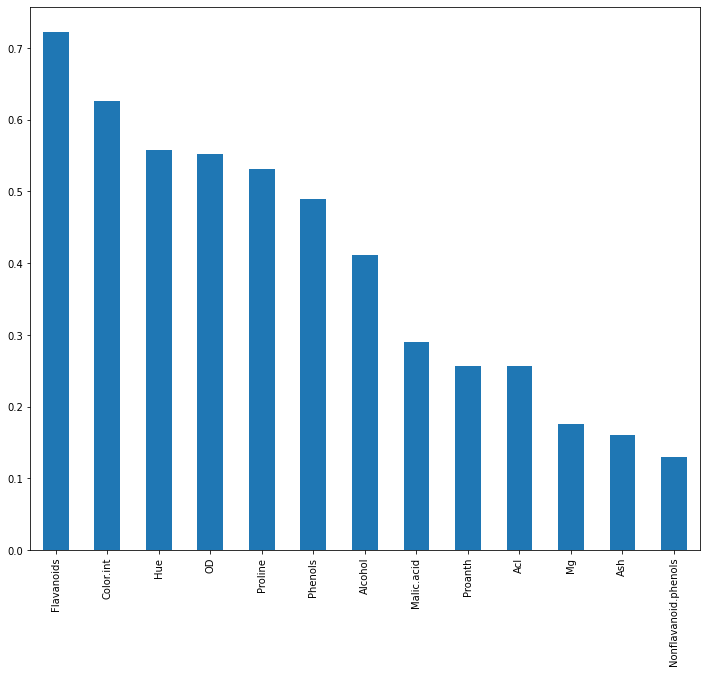

In [11]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(12,10))

Observation:  
    1) The highest value for the mutual information is with Flavanoids and its 0.721156
      
     In this context I am willing to select only top five features for the model training so i am willing to select top 5   
     I will be selecting the top 5 features using the SelectKBesrt method in sklearn


In [12]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif,k=5) # here k determines the number of features you want to select
sel_five_cols.fit(X_train,y_train)

top_5_cols = X_train.columns[sel_five_cols.get_support()]
top_5_cols

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

### Lets then delete all the other columns than top 5 from both the X_train and X_test

In [15]:
for columns in X_train.columns:
    if columns not in top_5_cols:
        X_train.drop(labels=[columns],axis=1,inplace=True)
X_train.columns

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

In [18]:
for columns in X_test.columns:
    if columns not in top_5_cols:
        X_test.drop(labels=[columns],axis=1,inplace=True)


In [19]:
X_test.columns

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

# Now our data is ready to get trained